<a href="https://colab.research.google.com/github/Orley74/ML_projects_python/blob/main/rozpoznawanie_zwierzat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import bibliotek


In [ ]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
gpus = tf.config.list_physical_devices('GPU')

for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

wprowadzenie sciezek do zdjec i selekcja ich


In [ ]:
resources = 'Resources'
img_extens = ['JPEG', 'JPG', 'BMP', 'PNG']

In [ ]:
for img_type in os.listdir(resources):
    for img in os.listdir(os.path.join(resources,img_type)):
        image_path = os.path.join(resources,img_type,img)
        try:
            img = Image.open(image_path)
            if img.format not in img_extens:
              os.remove(image_path)

        except:
            print("blad")

FileNotFoundError: ignored

In [ ]:
os.listdir('Resources')

FileNotFoundError: ignored

In [ ]:

folder_path = "Resources"

checkpoint_folder = os.path.join(folder_path, ".ipynb_checkpoints")

if os.path.exists(checkpoint_folder):
    os.system(f"rm -rf {checkpoint_folder}")  # Dla systemów Unix/Linux
    # os.system(f"rmdir /s {checkpoint_folder}")  # Dla systemu Windows
    print(".ipynb_checkpoints folder został usunięty.")
else:
    print("Brak folderu .ipynb_checkpoints.")

Brak folderu .ipynb_checkpoints.


zaladowanie wszystkiego do keras dataset

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(resources)

NotFoundError: ignored

wyswietlenie


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()


NameError: ignored

In [ ]:
batch[1]

NameError: ignored

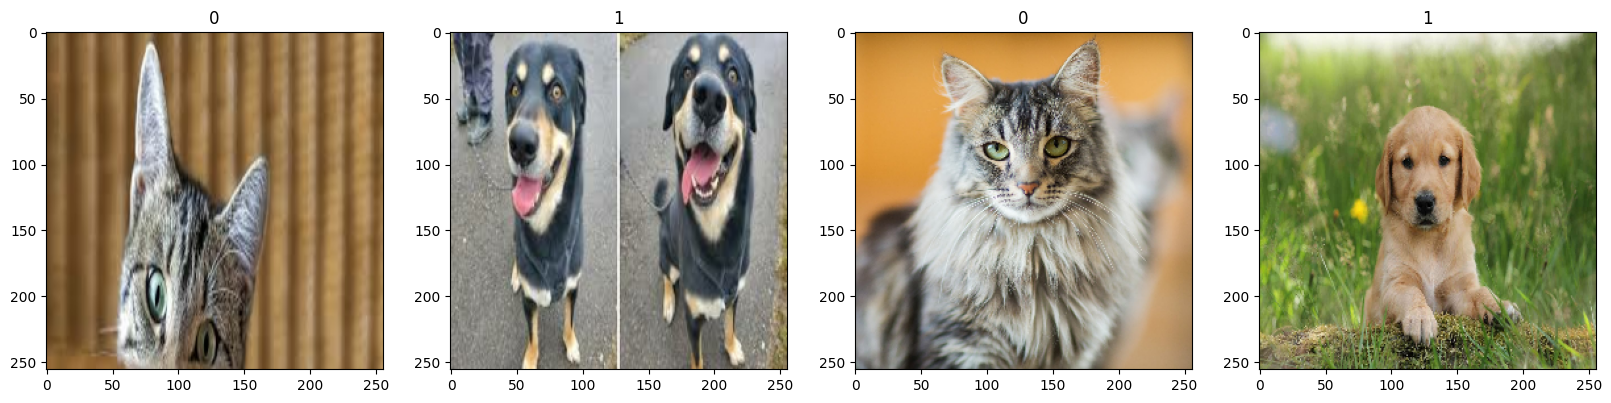

In [ ]:

fig, ax = plt.subplots(ncols= 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()


In [ ]:
batch = scaled_iterator.next()

podzielenie na zestawy


In [ ]:
len(data)

20

In [ ]:
train_data = int(len(data)*.7)
val_data = int(len(data)*.2)
test_data = int(len(data)*.1)

In [ ]:
train_data + val_data + test_data

20

teraz trzeba podzielic na zestawy wyzej sa tylko numery batch (kazdy batch ma 32 zdjecia) Przed tym krokiem trzeba wymieszac dane shuffle ale tu sa juz git


In [ ]:
train = data.take(train_data)
val = data.skip(train_data).take(val_data)
test = data.skip(train_data + val_data).take(test_data)

model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

In [ ]:
logdir='logs'
tf_log = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
Y =

In [ ]:
hist = model.fit(train, epochs=20, validation_data = val, callbacks = [tf_log])

Epoch 1/20
14/14 [==============================] - 48s 3s/step - loss: 1.1224 - accuracy: 0.5179 - val_loss: 0.6575 - val_accuracy: 0.6094
Epoch 2/20
14/14 [==============================] - 45s 3s/step - loss: 0.6770 - accuracy: 0.5670 - val_loss: 0.6660 - val_accuracy: 0.6406
Epoch 3/20
14/14 [==============================] - 46s 3s/step - loss: 0.6708 - accuracy: 0.6027 - val_loss: 0.6347 - val_accuracy: 0.7031
Epoch 4/20
14/14 [==============================] - 46s 3s/step - loss: 0.6327 - accuracy: 0.6674 - val_loss: 0.5980 - val_accuracy: 0.6953
Epoch 5/20
14/14 [==============================] - 46s 3s/step - loss: 0.5831 - accuracy: 0.6897 - val_loss: 0.5619 - val_accuracy: 0.7188
Epoch 6/20
14/14 [==============================] - 57s 4s/step - loss: 0.5340 - accuracy: 0.7344 - val_loss: 0.5026 - val_accuracy: 0.7500
Epoch 7/20
14/14 [==============================] - 47s 3s/step - loss: 0.4639 - accuracy: 0.7879 - val_loss: 0.3951 - val_accuracy: 0.8750
Epoch 8/20
14/14 [==

In [ ]:
hist.history

{'loss': [1.122408151626587,
  0.6769595146179199,
  0.6708014607429504,
  0.6326622366905212,
  0.5830585360527039,
  0.5340455174446106,
  0.4638960659503937,
  0.41860368847846985,
  0.3375619351863861,
  0.2901633679866791,
  0.24238541722297668,
  0.20819829404354095,
  0.16831998527050018,
  0.11082959175109863,
  0.10122519731521606,
  0.08405055850744247,
  0.03821728751063347,
  0.042273443192243576,
  0.037860315293073654,
  0.026358922943472862],
 'accuracy': [0.5178571343421936,
  0.5669642686843872,
  0.6026785969734192,
  0.6674107313156128,
  0.6897321343421936,
  0.734375,
  0.7879464030265808,
  0.8214285969734192,
  0.8683035969734192,
  0.8883928656578064,
  0.9040178656578064,
  0.921875,
  0.9598214030265808,
  0.9754464030265808,
  0.9620535969734192,
  0.9776785969734192,
  0.9933035969734192,
  0.9933035969734192,
  0.9933035969734192,
  0.9933035969734192],
 'val_loss': [0.6575482487678528,
  0.6659707427024841,
  0.6347050666809082,
  0.5979678630828857,
  0.5

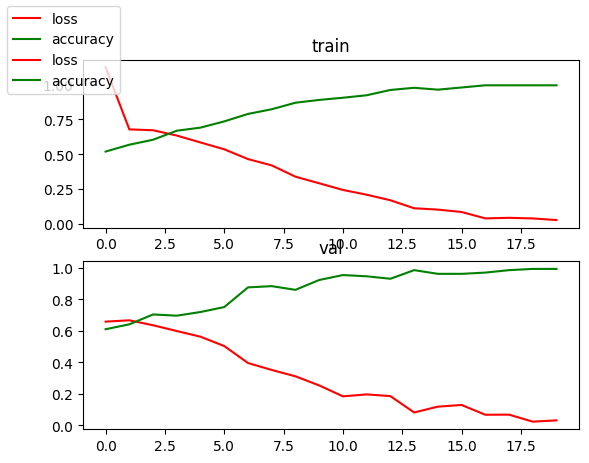

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'],c='r',label='loss')
ax[0].plot(hist.history['accuracy'],c='g',label='accuracy')
ax[0].title.set_text('train')

ax[1].plot(hist.history['val_loss'],c='r',label='loss')
ax[1].plot(hist.history['val_accuracy'],c='g',label='accuracy')
ax[1].title.set_text('val')

fig.legend(loc='upper left')

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

test na danych tesotowych

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

NameError: ignored

In [ ]:
yhat

NameError: ignored

test na nowych danych

In [ ]:
import cv2

In [ ]:
img = Image.open('test.jpg')

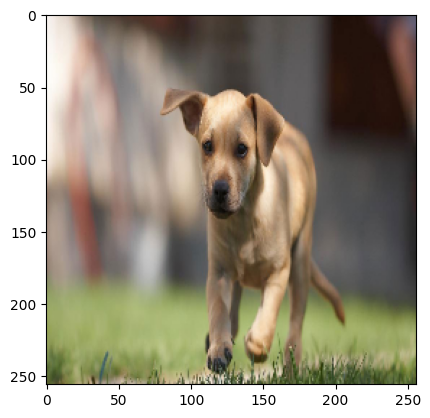

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 59ms/step


In [ ]:
yhat

array([[0.7818416]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'na zdjeciu jest pies')
else:
    print(f'na zdjeciu jest kot')

na zdjeciu jest pies


#Zapis

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','kot_czy_pies.h5'))

wczytywanie danych z modelu

In [ ]:
model = load_model('models/kot_czy_pies.h5')